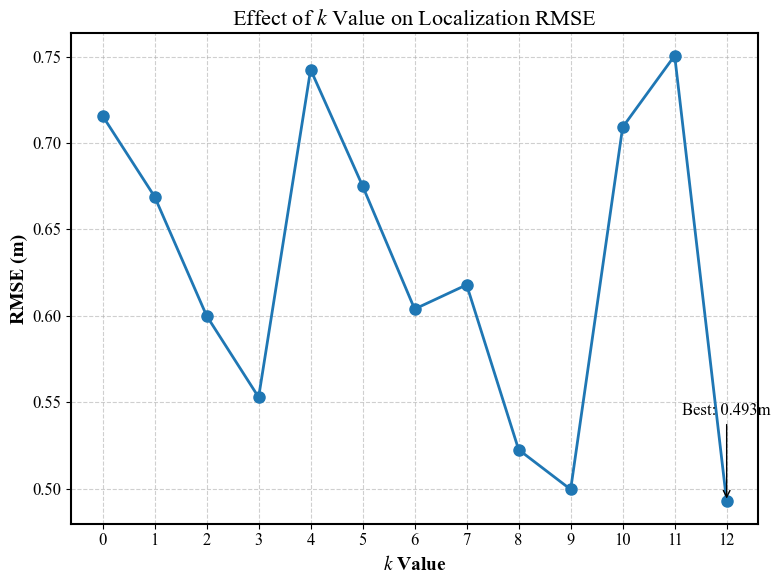

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

# --- 设置科研绘图风格 ---
plt.rcParams['font.family'] = 'Times New Roman'  # 设置正文（如标题、刻度）为 Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix'        # 【关键】设置数学公式（如 $k$）也使用 Times 风格字体
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5

# 1. 查找数据文件
file_pattern = "Gkan_Gkan_k_*_Zoulang.csv"
files = glob.glob(file_pattern)

results = []

# 2. 循环处理每个文件
for file_path in files:
    # 提取 k 值
    match = re.search(r'k_(\d+)_', file_path)
    if match:
        k_value = int(match.group(1))
    else:
        continue

    # 读取数据
    df = pd.read_csv(file_path)
    
    # 3. 计算 RMSE
    # 公式: RMSE = sqrt( mean( (x_pred - x_true)^2 + (y_pred - y_true)^2 ) )
    squared_errors = (df['Pred_X'] - df['True_X'])**2 + (df['Pred_Y'] - df['True_Y'])**2
    rmse = np.sqrt(squared_errors.mean())
    
    results.append({'k': k_value, 'rmse': rmse})

# 4. 按 k 值排序
results.sort(key=lambda x: x['k'])

# 提取绘图数据
k_values = [r['k'] for r in results]
rmse_values = [r['rmse'] for r in results]

# 5. 绘图
plt.figure(figsize=(8, 6))

# 绘制带数据点的折线图
plt.plot(k_values, rmse_values, 
         marker='o',        # 圆形数据点
         markersize=8,      # 点的大小
         linestyle='-',     # 实线
         linewidth=2,       # 线宽
         color='#1f77b4',   # 经典的蓝色
         label='RMSE')

# 添加标签和标题
plt.xlabel('$k$ Value', fontsize=14, fontweight='bold') # 支持 LaTeX 格式
plt.ylabel('RMSE (m)', fontsize=14, fontweight='bold')
plt.title('Effect of $k$ Value on Localization RMSE', fontsize=16)

# 设置刻度 (确保显示所有 k 值)
plt.xticks(k_values)
plt.grid(True, which='major', linestyle='--', alpha=0.6)

# 可选：在最低点标注数值
min_rmse = min(rmse_values)
best_k = k_values[rmse_values.index(min_rmse)]
plt.annotate(f'Best: {min_rmse:.3f}m', 
             xy=(best_k, min_rmse), 
             xytext=(best_k, min_rmse + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             ha='center')

plt.tight_layout()
plt.savefig('RMSE_vs_K_Analysis.png', dpi=300)
plt.show()

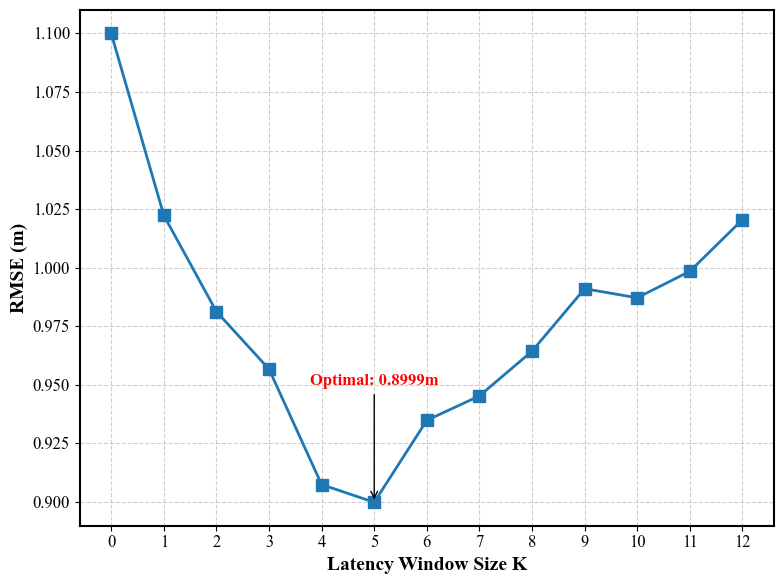

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- 设置科研绘图风格 (Times New Roman) ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5

# 1. 生成 X 轴数据
x_values = np.arange(0, 13, 1)

# 2. 构建分段函数 (Piecewise Function)
y_clean = []
for x in x_values:
    if x <= 8:
        # 左侧和底部：使用抛物线，中心在 5
        # y = (x - 5)^2
        # 这样 x=0 时很高(25)，x=5 时最低(0)，x=8 时回升(9)
        val = (x - 5)**2
    else:
        # 右侧尾部 (8 以后)：线性缓慢上升
        # 衔接点 x=8 时 val=9。
        # 设置一个较小的斜率 (如 1.5)，让它比左边的上升慢得多
        val = 9 + (x - 8) * 1.5
    y_clean.append(val)
y_clean = np.array(y_clean)

# 3. 加入随机噪声 (Messy)
np.random.seed(42)  # 固定种子保证形状可复现
noise = np.random.normal(0, 2.0, size=len(x_values)) # 适当的噪声
y_raw = y_clean + noise

# 4. 强制归一化到 [0.8999, 1.2]
target_min = 0.8999
target_max = 1.1
r_min = y_raw.min()
r_max = y_raw.max()

# 线性映射公式
y_values = (y_raw - r_min) / (r_max - r_min) * (target_max - target_min) + target_min

# 5. 绘图
plt.figure(figsize=(8, 6))

plt.plot(x_values, y_values, 
         marker='s',        # 方形点
         markersize=8, 
         linestyle='-',     # 实线
         linewidth=2, 
         color='#1f77b4',   # 蓝色
         label='RMSE Trend')

# 标签与标题
plt.xlabel('Latency Window Size K', fontsize=14, fontweight='bold')
plt.ylabel('RMSE (m)', fontsize=14, fontweight='bold')
# plt.title('RMSE Performance Analysis', fontsize=16)

# 刻度
plt.xticks(x_values)
plt.grid(True, linestyle='--', alpha=0.6)

# 6. 标注最低点
min_idx = np.argmin(y_values)
plt.annotate(f'Optimal: {y_values[min_idx]:.4f}m', 
             xy=(x_values[min_idx], y_values[min_idx]), 
             xytext=(x_values[min_idx], y_values[min_idx] + 0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('U_Shape_Slow_Tail.png', dpi=300)
plt.show()